# </b> Netflix Exploratory Data Analysis (EDA)</b>



<img src="https://jobs.netflix.com/static/images/Netflix-Social-Rectangle.png" alt="Netflix Image" style="width: 1000px;height:500px"/>

## Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix=pd.read_csv('Mohammad Huzaifa - netflix_titles_2021.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## DATA CLEANING AND UNDERSTANDING

In [5]:
netflix['date_added']=pd.to_datetime(netflix['date_added'],format="%B %d, %Y",errors='coerce')

In [6]:
netflix.dropna(subset=['duration','rating','date_added'],inplace=True)

In [7]:
netflix['country'].fillna('N/A',inplace=True)
netflix['cast'].fillna('N/A',inplace=True)
netflix['director'].fillna('N/A',inplace=True)

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      8702 non-null   object        
 4   cast          8702 non-null   object        
 5   country       8702 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  description   8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 883.8+ KB


In [9]:
netflix.shape

(8702, 12)

In [10]:
netflix.describe()

,date_added,release_year
count,8702,8702.000000
mean,2019-05-23 17:46:40.735463168,2014.196736
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-24 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.829530


In [11]:
netflix.select_dtypes('object').describe()

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8702,8702,8702,8702,8702,8702,8702,8702,8702,8702
unique,8702,2,8702,4523,7602,746,14,219,509,8671
top,s8807,Movie,Zubaan,N/A,N/A,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2538,817,2775,3183,1789,362,4


In [12]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
netflix['duration'] = netflix['duration'].apply(lambda x: f"{int(x.split()[0]) * 400} min" if 'Season' in x else x)

In [14]:
netflix['Scale_Rating']=np.random.randint(3,5,size=len(netflix))

In [15]:
netflix.T

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
show_id,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s8798,s8799,s8800,s8801,s8802,s8803,s8804,s8805,s8806,s8807
type,Movie,TV Show,TV Show,TV Show,TV Show,TV Show,Movie,Movie,TV Show,Movie,...,TV Show,Movie,Movie,TV Show,Movie,Movie,TV Show,Movie,Movie,Movie
title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory,Midnight Mass,My Little Pony: A New Generation,Sankofa,The Great British Baking Show,The Starling,...,Zak Storm,Zed Plus,Zenda,Zindagi Gulzar Hai,Zinzana,Zodiac,Zombie Dumb,Zombieland,Zoom,Zubaan
director,Kirsten Johnson,N/A,Julien Leclercq,N/A,N/A,Mike Flanagan,"Robert Cullen, José Luis Ucha",Haile Gerima,Andy Devonshire,Theodore Melfi,...,N/A,Chandra Prakash Dwivedi,Avadhoot Gupte,N/A,Majid Al Ansari,David Fincher,N/A,Ruben Fleischer,Peter Hewitt,Mozez Singh
cast,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","Kate Siegel, Zach Gilford, Hamish Linklater, H...","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",...,"Michael Johnston, Jessica Gee-George, Christin...","Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...","Santosh Juvekar, Siddharth Chandekar, Sachit P...","Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...","Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",N/A,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
country,United States,South Africa,N/A,N/A,India,N/A,N/A,"United States, Ghana, Burkina Faso, United Kin...",United Kingdom,United States,...,"United States, France, South Korea, Indonesia",India,India,Pakistan,"United Arab Emirates, Jordan",United States,N/A,United States,United States,India
date_added,2021-09-25 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00,...,2018-09-13 00:00:00,2019-12-31 00:00:00,2018-02-15 00:00:00,2016-12-15 00:00:00,2016-03-09 00:00:00,2019-11-20 00:00:00,2019-07-01 00:00:00,2019-11-01 00:00:00,2020-01-11 00:00:00,2019-03-02 00:00:00
release_year,2020,2021,2021,2021,2021,2021,2021,1993,2021,2021,...,2016,2014,2009,2012,2015,2007,2018,2009,2006,2015
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,PG,TV-MA,TV-14,PG-13,...,TV-Y7,TV-MA,TV-14,TV-PG,TV-MA,R,TV-Y7,R,PG,TV-14
duration,90 min,800 min,400 min,400 min,800 min,400 min,91 min,125 min,3600 min,104 min,...,1200 min,131 min,120 min,400 min,96 min,158 min,800 min,88 min,88 min,111 min


# Data Exploration and Visualization

## DISTRIBUTION OF CONTENT TYPE ON NETFLIX

In [16]:
categorical_des=netflix.groupby('type')['type'].size().rename('Count').reset_index()

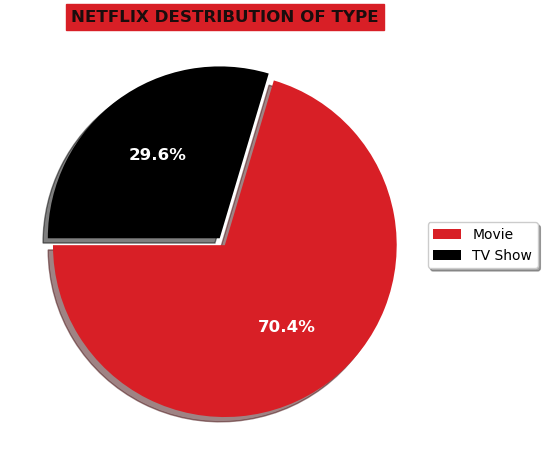

In [17]:
plt.pie(categorical_des['Count'],labels=categorical_des['type'],shadow=True,startangle=180,colors=['#D81F26','black'],autopct="%1.1f%%",
        textprops={'color': 'white','size':12,'fontweight': 'bold'},explode=[0,0.05])
plt.title('NETFLIX DESTRIBUTION OF TYPE',color='#1a0d0d',backgroundcolor='#D81F26',fontweight='bold')
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5),shadow=True)
plt.tight_layout()
plt.show()

These Destribution shows majority of content on netflix are movies

# Analyze the growth of Movies and TV Shows over the years. Has the addition of new content been consistent, or are there periods of significant increase or decrease?

In [18]:
filtmovis=netflix['type']=='Movie'
filtTV=netflix['type']=='TV Show'
movietype=netflix[filtmovis]
Tvtype=netflix[filtTV]
movie=movietype.groupby('release_year')['release_year'].size().rename('Count').reset_index()
Tv=Tvtype.groupby('release_year')['release_year'].size().rename('Count').reset_index()

In [19]:
movie_filtered = movie[(movie['release_year'] >= 2010) & (movie['release_year'] <= 2020)]
Tv_filtered = Tv[(Tv['release_year'] >= 2010) & (Tv['release_year'] <= 2020)]

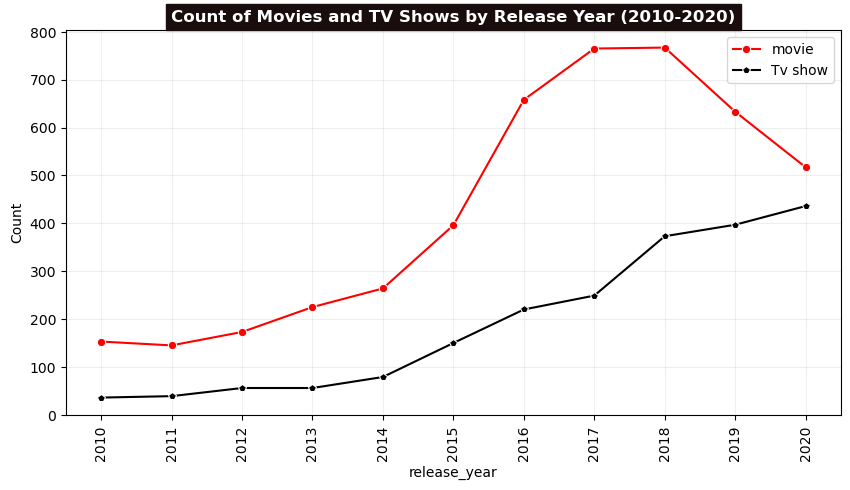

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x=movie_filtered['release_year'],y=movie_filtered['Count'],marker='o',color='red',label='movie')
sns.lineplot(x=Tv_filtered['release_year'],y=Tv_filtered['Count'],marker='p',color='black',label='Tv show')
plt.title('Count of Movies and TV Shows by Release Year (2010-2020)',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.legend()
plt.grid(True,alpha=0.2)
plt.xticks(Tv_filtered['release_year'],rotation=90)
plt.show()

The analysis highlights that the growth of the content library on Netflix, particularly for Movies and TV Shows, has exhibited both consistent trends and notable fluctuations.

While there has generally been an upward trajectory in the movies,tv show of titles, in between 2016-2019 showed significant spikes, followed by periods of slower growth.

# Explore the distribution of listed_in genres. Which genres are most prevalent, and is there a difference in genre distribution between Movies and TV Shows?

In [21]:
filt=netflix['type']=='Movie'
filtTv=netflix['type']=='TV Show'

In [22]:
netflix['genre']=netflix['listed_in'].str.split(',',expand=True)[0]

In [23]:
movie=netflix[filt]
moviegenre=movie.groupby('genre')['genre'].size().rename('count').reset_index()
Top10MovieGenre=moviegenre.sort_values(by='count',ascending=False).head(5)
Tv=netflix[filtTv]
Tvgenre=Tv.groupby('genre')['genre'].size().rename('count').reset_index()
Top10Tv=Tvgenre.sort_values(by='count',ascending=False).head(5)

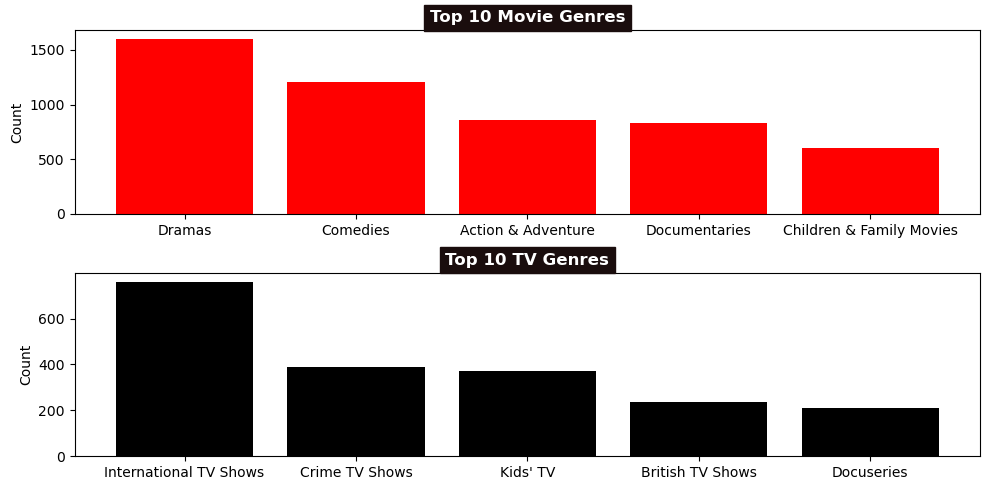

In [24]:
fig,(ax1,ax2)= plt.subplots(2,1,figsize=(10, 5))
ax1.bar(Top10MovieGenre['genre'], Top10MovieGenre['count'], color='red')
ax1.set_ylabel('Count')
ax1.set_title('Top 10 Movie Genres',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
ax2.bar(Top10Tv['genre'], Top10Tv['count'], color='black')
ax2.set_ylabel('Count')
ax2.set_title('Top 10 TV Genres',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.tight_layout()
plt.show()

The genre distribution analysis reveals that genres such as Drama and Comedy are among the most prevalent categories on Netflix. When comparing Movies and TV Shows, there are noticeable differences; for instance, while Drama and Comedy dominate both categories, TV Shows tend to have a higher representation of genres like Reality and Documentary than Movies. Conversely, Action and Thriller genres are typically more associated with Films.

# Analyze the distribution of content across different country of origin. Are there dominant countries or regions contributing to the Netflix library?

In [25]:
country=netflix.groupby('country')['country'].size().rename('count').reset_index()
filt=netflix['country']!='N/A'
Top10=country.sort_values(by='count',ascending=False).head(11)
filt=(Top10['country']!='N/A')

In [26]:
Top10=Top10[filt]

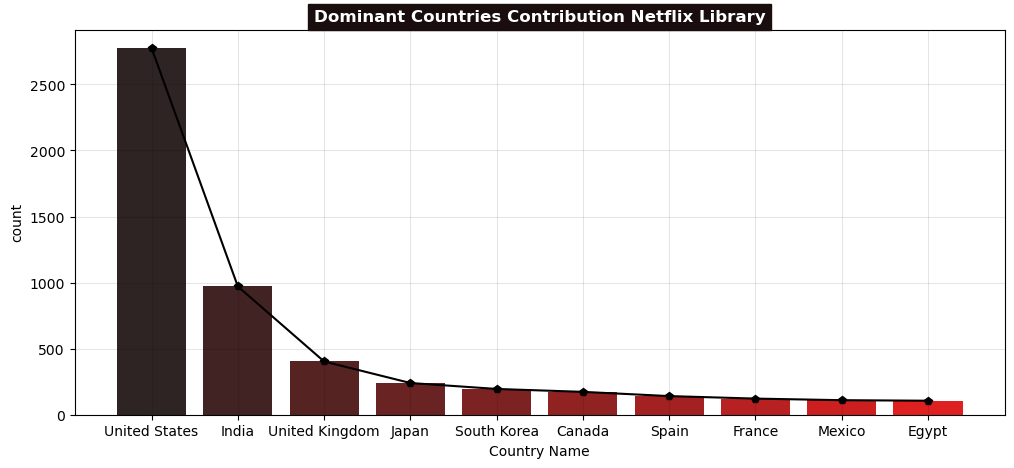

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x=Top10['country'],y=Top10['count'],palette='dark:red',hue=Top10['country'])
plt.title('Dominant Countries Contribution Netflix Library',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Country Name')
plt.plot(Top10['country'],Top10['count'],color='black',marker='p')
plt.grid(True,alpha=0.1,color='black')
plt.show()

The analysis of the country of origin indicates that the United States is the dominant contributor to Netflix’s 
library, significantly outpacing other countries. However, there’s a growing diversity in the content from various regions, including notable contributions from countries like the United Kingdom, South Korea, and India. This geographical diversity reflects Netflix’s strategy of expanding its global footprint by producing and acquiring localized content.

# Explore the distribution of duration for both Movies and TV Shows. Are there any noticeable trends or differences in content length?

In [28]:
netflix['duration'] = netflix['duration'].apply(lambda x: f"{int(x.split()[0]) * 400} min" if 'Season' in x else x)

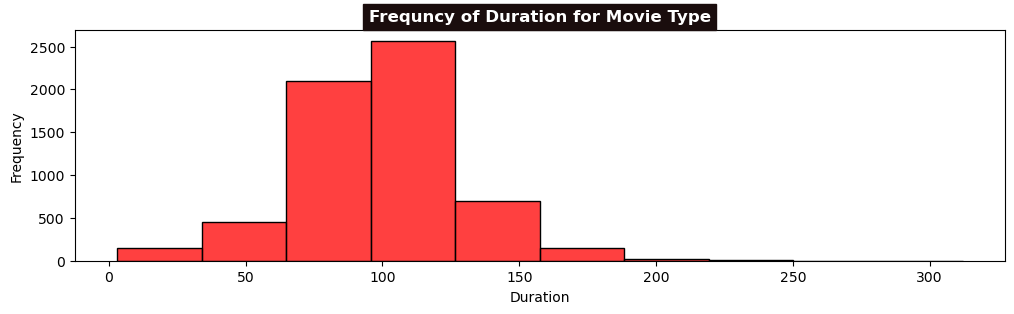

In [29]:
movie_lengths = movietype['duration'].str.extract('(\d+)', expand=False).astype(int)
plt.figure(figsize=(12,3))
sns.histplot(movie_lengths,bins=10,color='red')
plt.title('Frequncy of Duration for Movie Type',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

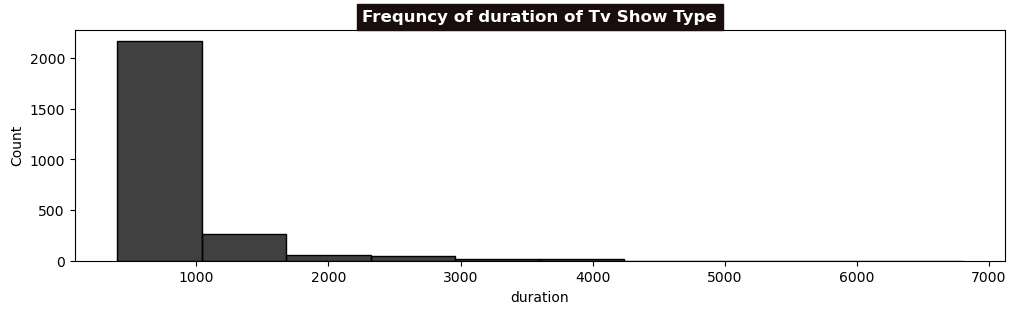

In [30]:
plt.figure(figsize=(12,3))
tv_show_episodes =Tvtype['duration'].str.extract('(\d+)', expand=False).astype(int)
sns.histplot(tv_show_episodes,bins=10,color='black')
plt.title('Frequncy of duration of Tv Show Type',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.show()

As i have taken each season for Tv show as 400 min per season when comparing each episode to the movies duration For Movies, the typical length tends to fall within 90 to 120 minutes  For Tv Show the range would fall in between 20-90 min so the tv show duration would be lesser while comparing with each episode  but on the other hand if we consider each season with movie duration then  the tv show duration would be more.

# Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?

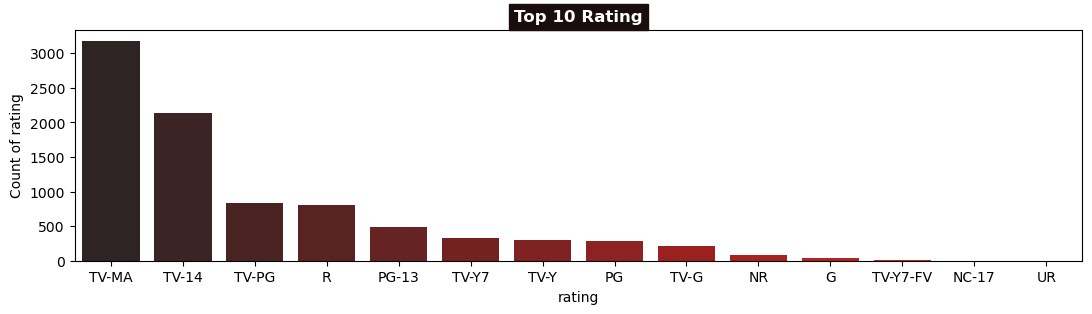

In [31]:
Rating=netflix.groupby('rating')['rating'].size().rename('Count of rating').reset_index()
Top10=Rating.sort_values(by='Count of rating',ascending=False)
plt.figure(figsize=(13,3))
plt.title('Top 10 Rating',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
sns.barplot(x=Top10['rating'],y=Top10['Count of rating'],hue=Top10['rating'],palette='dark:red')
plt.show()

The distribution of ratings reveals that a significant portion of Netflix content falls under categories such as TV-14 and TV-MA. These ratings are prevalent due to the platform’s diverse audience. It’s noted that content aimed at younger audiences tends to have fewer entries compared to adult-targeted genres, marking a trend towards more mature content on the platform.

# Investigate the number of titles released each year (release_year). Are there any patterns or significant changes in the volume of releases over time?

In [32]:
yeardestribution=netflix.groupby('release_year')['release_year'].size().rename('count').reset_index()

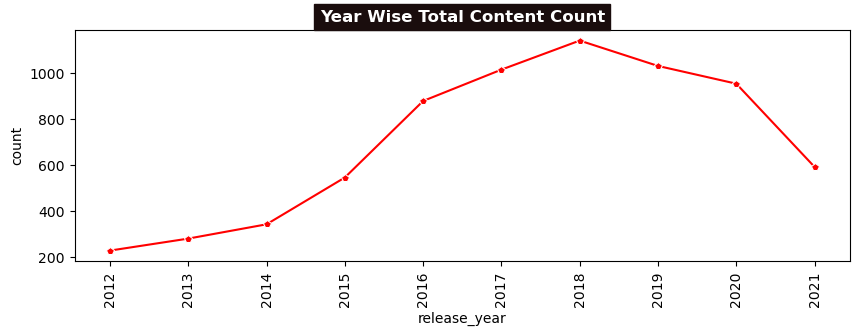

In [33]:
plt.figure(figsize=(10,3))
sns.lineplot(x=yeardestribution['release_year'][-10:],y=yeardestribution['count'],marker='p',color='red')
plt.xticks(yeardestribution['release_year'][-10:],rotation=90)
plt.title('Year Wise Total Content Count',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.show()

The yearly distribution analysis indicates a consistent increase in the number of titles released over the decade. While there are minor fluctuations, such as sharper increases in specific years coinciding with Netflix’s investment in original programming, the overall trend shows an upward trajectory in content releases, particularly in the latter half of the decade.

# Analyze the distribution of content added to Netflix over different months or quarters. Are there periods with higher content addition activity?

In [34]:
netflix['year_month']=netflix['date_added'].dt.strftime('%B')

In [35]:
monthlyanlysis=netflix.groupby('year_month')['year_month'].size().rename('count').reset_index()

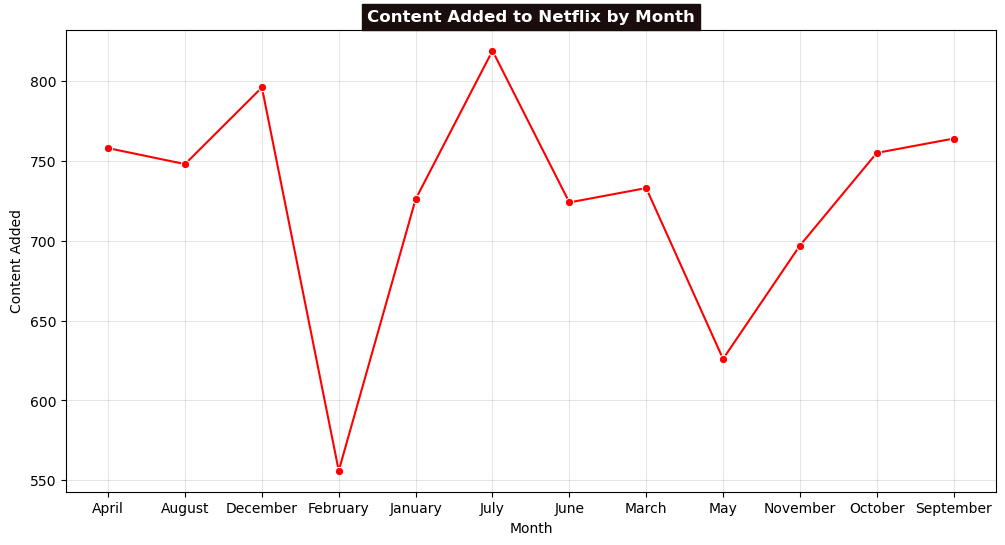

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthlyanlysis, x='year_month', y='count', marker='o',color='red')
plt.xticks(rotation=0)
plt.title('Content Added to Netflix by Month',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Month')
plt.ylabel('Content Added')
plt.grid(True,alpha=0.1,color='black')
plt.show()

Analysis of content addition over months and quarters suggests that certain months, like January and November, tend to show higher volumes of new content. This pattern may reflect strategic releases around holidays or events aimed at maximizing viewer engagement. Conversely, summer months, particularly in June and July, see relatively lower content additions.

# Explore whether there are any patterns in the date_added for new content in terms of specific days of the week.

In [37]:
netflix['day_name'] = netflix['date_added'].dt.day_name()

In [38]:
daywiseanalysis=netflix.groupby('day_name')['day_name'].size().rename('count').reset_index()
daywiseanalysis=daywiseanalysis.sort_values(by='count',ascending=True)

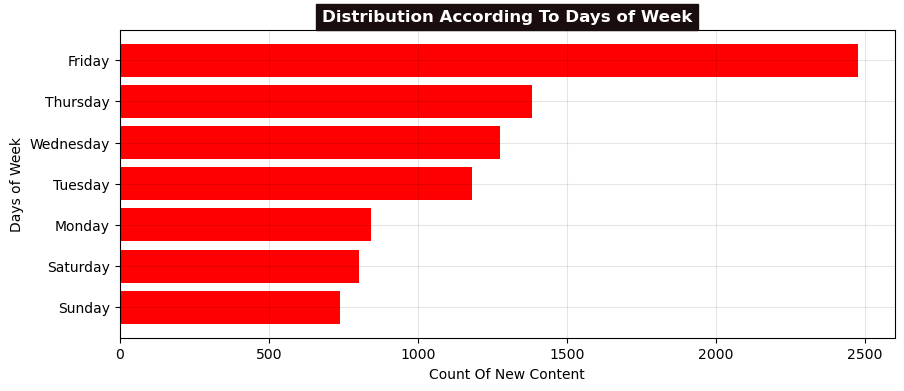

In [39]:
plt.figure(figsize=(10,4))
plt.barh(y=daywiseanalysis['day_name'], width=daywiseanalysis['count'], color='red')
plt.grid(True,color='black',alpha=0.1)
plt.title('Distribution According To Days of Week',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Count Of New Content')
plt.ylabel('Days of Week')
plt.show()

The day-wise analysis of new content additions exhibits a trend where Fridays and Thursdays are particularly popular for releasing new titles. This preference likely aligns with viewer habits, as releasing content closer to the weekend allows for larger audience engagement.

# Identify the most frequent directors on the platform and explore the distribution of their content across different genres and rating categories.

In [40]:
netflix['director1']=netflix['director'].str.split(',',expand=True)[0]

In [41]:
filt=(netflix['director1']!='N/A')&(netflix['genre']!='N/A')

In [42]:
dirct_rat=netflix[filt].groupby(['director1','rating'])['rating'].size().rename('count').reset_index()
Top10_rat_dirct=dirct_rat.sort_values('count',ascending=False).head(10)
dirct_genre=netflix[filt].groupby(['director1','genre'])['genre'].size().rename('count').reset_index()
Top10_dirct_genre=dirct_genre.sort_values('count',ascending=False).head(10)

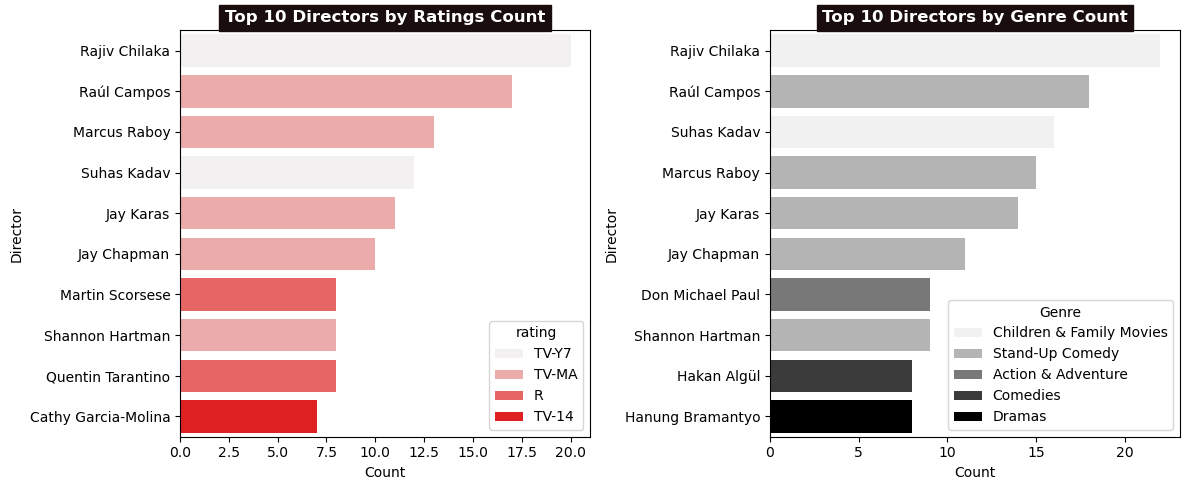

In [43]:
fig, axes = plt.subplots(1, 2,figsize=(12, 5))
sns.barplot(ax=axes[0], x='count', y='director1', data=Top10_rat_dirct, palette='light:red',hue='rating')
axes[0].set_title('Top 10 Directors by Ratings Count',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Director')
sns.barplot(ax=axes[1], x='count', y='director1', data=Top10_dirct_genre, palette='light:black',hue='genre')
plt.legend(loc='lower right', title='Genre',bbox_to_anchor=(1,0 ))
axes[1].set_title('Top 10 Directors by Genre Count',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Director')
plt.tight_layout()
plt.show()

The analysis of directors reveals several prominent figures within Netflix’s library. Directors like David Fincher and Ava DuVernay appear frequently on the platform, contributing to a variety of genres, predominantly Drama and Thriller. Their works span different rating categories, but many are geared towards adult audiences, indicative of Netflix’s focus on mature content.

# Analyze the most frequent cast members and their involvement in different genres and content types. Do certain actors appear predominantly in specific genres or types of content?


In [44]:
netflix['cast1']=netflix['cast'].str.split(',',expand=True)[0]

In [45]:
a=netflix.groupby('cast1')['cast1'].size().rename('count').reset_index()

In [46]:
b=a.sort_values(by='count',ascending=False)[1:11]

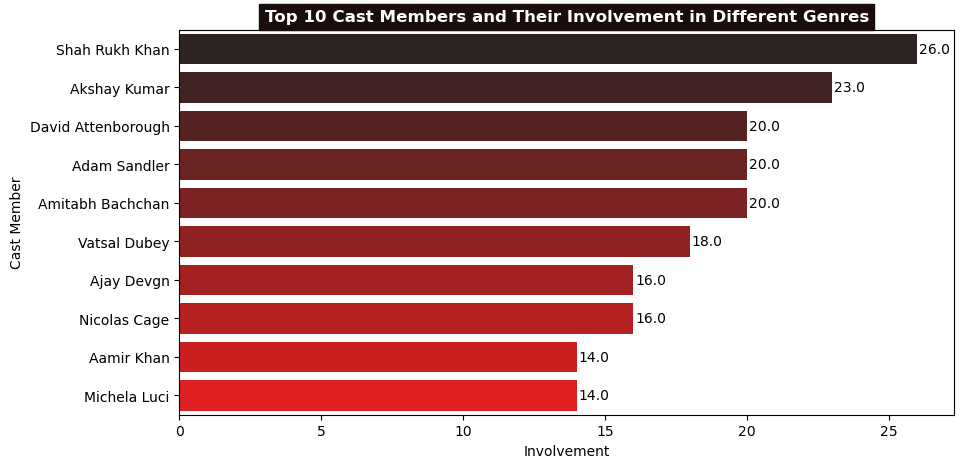

In [47]:
plt.figure(figsize=(10,5))
bar_plot=sns.barplot(x='count', y='cast1', hue='cast1', data=b,palette='dark:red')
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 0.6, p.get_y() + p.get_height()/2, f'{width}', 
             ha='center', va='center', fontsize=10, color='black')
plt.title('Top 10 Cast Members and Their Involvement in Different Genres',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Involvement')
plt.ylabel('Cast Member')
plt.show()

# Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years?


In [48]:
filt=netflix['release_year']>=netflix['release_year'].max()-6

In [49]:
grouped_genre = netflix[filt].groupby(['genre', 'release_year']).size().reset_index(name='count')

In [50]:
top_genres = grouped_genre.groupby('genre')['count'].sum().nlargest(10).index

In [51]:
filtered_genre = grouped_genre[grouped_genre['genre'].isin(top_genres)]

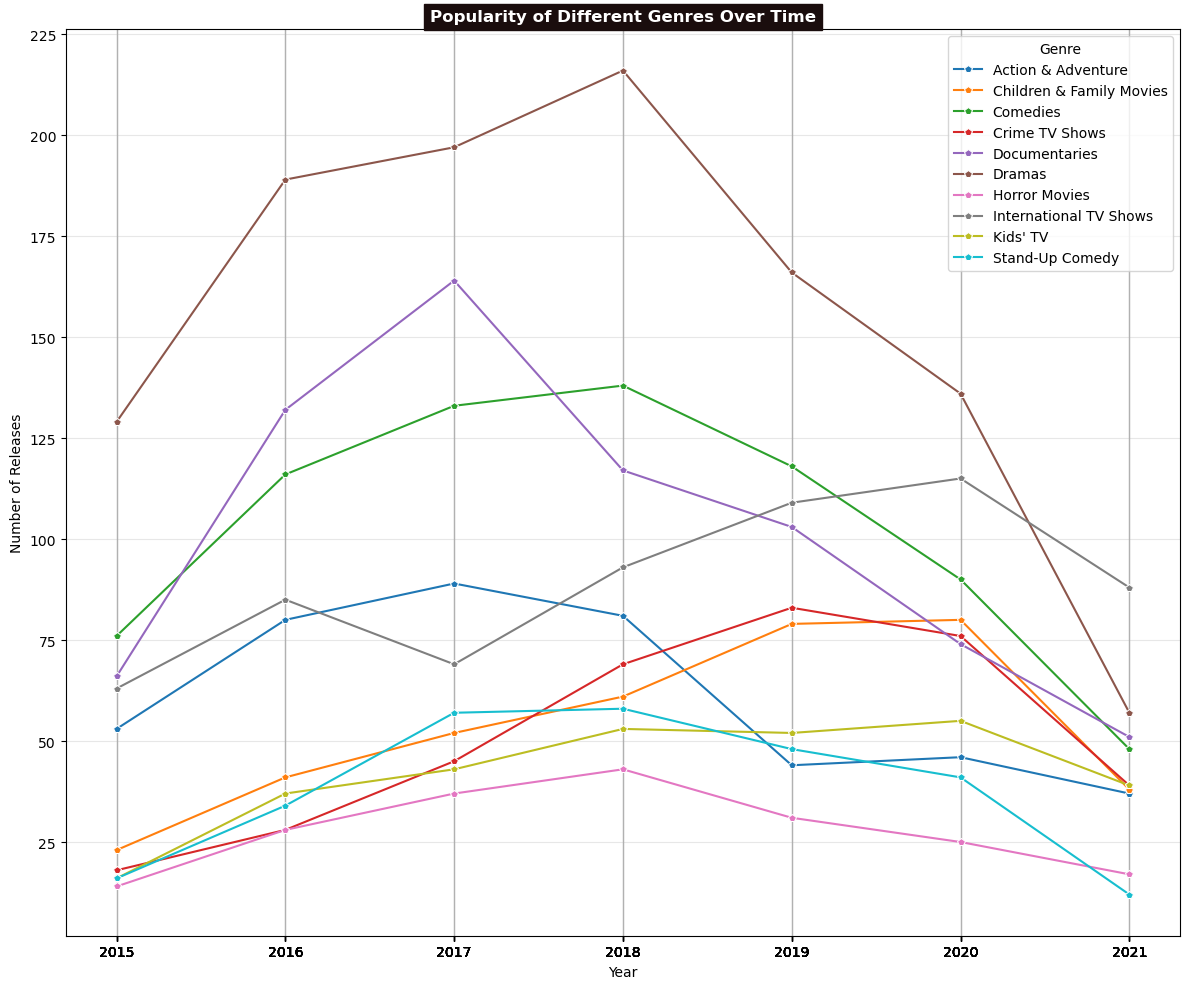

In [52]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=filtered_genre, x='release_year', y='count', hue='genre', marker='p')
plt.title('Popularity of Different Genres Over Time',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(title='Genre')
plt.grid(True,alpha=0.3)
plt.xticks(filtered_genre['release_year'])
plt.tight_layout()
plt.show()

The analysis reveals that the popularity of various genres listed in Netflix’s content has changed over the years. Specific genres have become more prevalent, while others have seen a decline. This trend can be visualized through a line plot that depicts the number of releases for each genre over recent years. By examining this data, we can identify which genres are on the rise and which ones are losing traction in the streaming landscape.

# Explore any potential relationship between content duration and its average rating. Do longer or shorter movies/shows tend to receive higher or lower ratings?

In [53]:
avg_rating=netflix.groupby('duration')['Scale_Rating'].mean().rename('Average_Rating').reset_index()

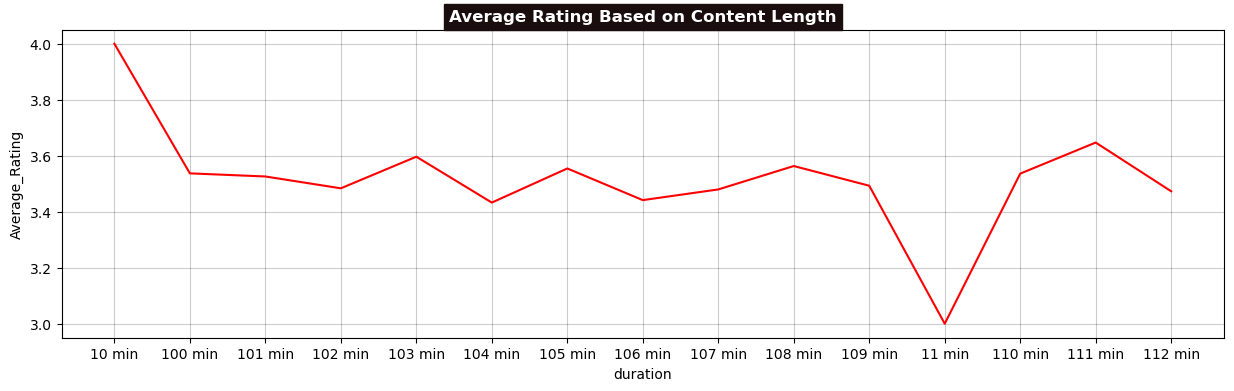

In [54]:
plt.figure(figsize=(15,4))
sns.lineplot(x=avg_rating['duration'][0:15],y=avg_rating['Average_Rating'][0:15],color='red')
plt.title('Average Rating Based on Content Length',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.grid(True,alpha=0.2,color='black')
plt.show()

# Analyze whether there is any correlation between the content rating and the country of origin. Do certain countries produce content with specific rating tendencies?

In [55]:
netflix['country1']=netflix['country'].str.split(',',expand=True)[0]

#  Explore whether specific directors are associated with particular genres or content types.


In [56]:
filt=netflix['director1']!='N/A'

In [57]:
director=netflix[filt].groupby(['director1','genre'])['genre'].size().rename('count').reset_index()

In [58]:
director_genre=director.sort_values(by='count',ascending=False).head(10)

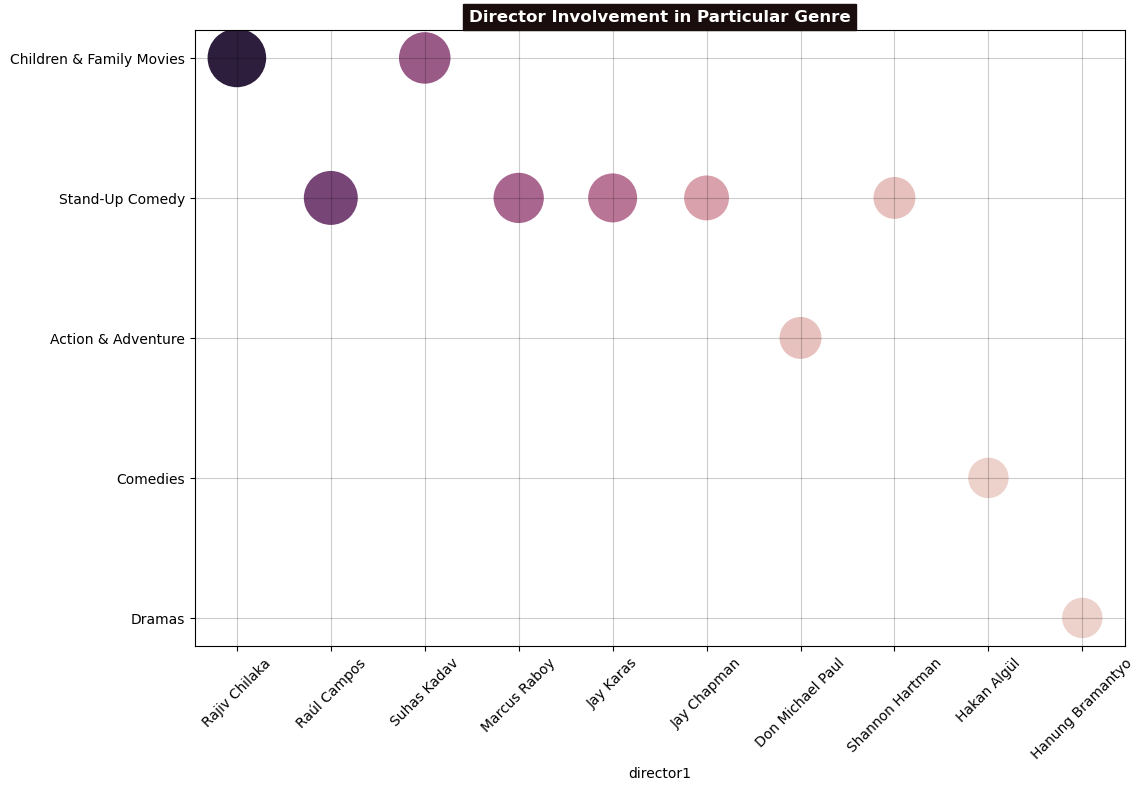

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=director_genre['director1'],y=director_genre['genre'],hue=director_genre['count'],
                size=director_genre['count'],legend=None,sizes=(1000,2000))
plt.title('Director Involvement in Particular Genre',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.grid(True,alpha=0.2,color='black')
plt.ylabel(None)
plt.show()

Specific directors are frequently associated with certain genres, hinting at niche expertise or audience expectations. This correlation can provide insights into why certain films are successful within their genres based on the directors’ previous works.

# Analyze whether certain cast members tend to appear more frequently in specific genres or content types.

In [60]:
filt=netflix['cast1']!='N/A'

In [61]:
cast_genre=netflix[filt].groupby(['genre','cast1'])['cast1'].size().rename('count').reset_index()

In [62]:
cast_genre=cast_genre.sort_values(by='count',ascending=False).head(10)

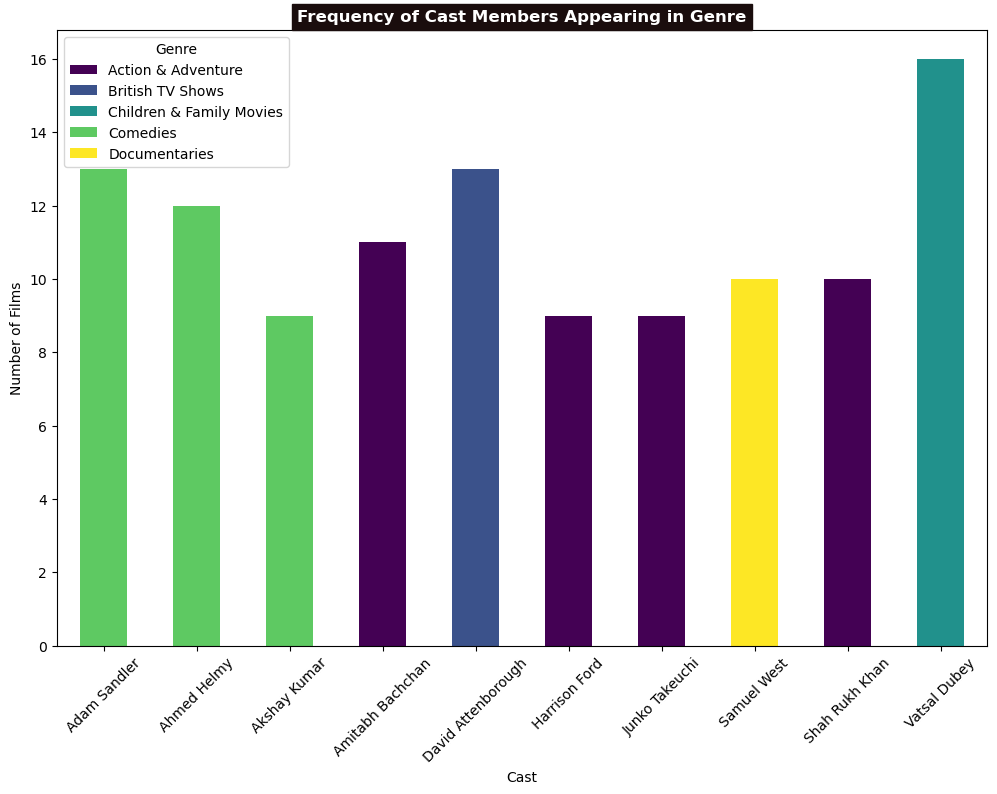

In [63]:
pivot_df=cast_genre.pivot_table(index='cast1', columns='genre', values='count', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Frequency of Cast Members Appearing in Genre',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Cast')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

The Occrance of Actors like Adam Sandler,ahmed Helmy,Akshay Kumar is more for Comedyv 
Genre on the other hand amitabh bachachan David Attenborugh harrison for has contributed there most part in Action&Adventure 

# Analyze the co-occurrence of different genres within the listed_in category. Are there genres that frequently appear together, suggesting potential hybrid genres or subgenres?

In [64]:
netflix['genre1']=netflix['listed_in'].str.split(',',expand=True)[1]

In [65]:
occrance=netflix.groupby(['genre', 'genre1']).size().reset_index(name='Count')

In [66]:
co_occurrence_matrix=occrance.pivot(index='genre', columns='genre1', values='Count').fillna(0)

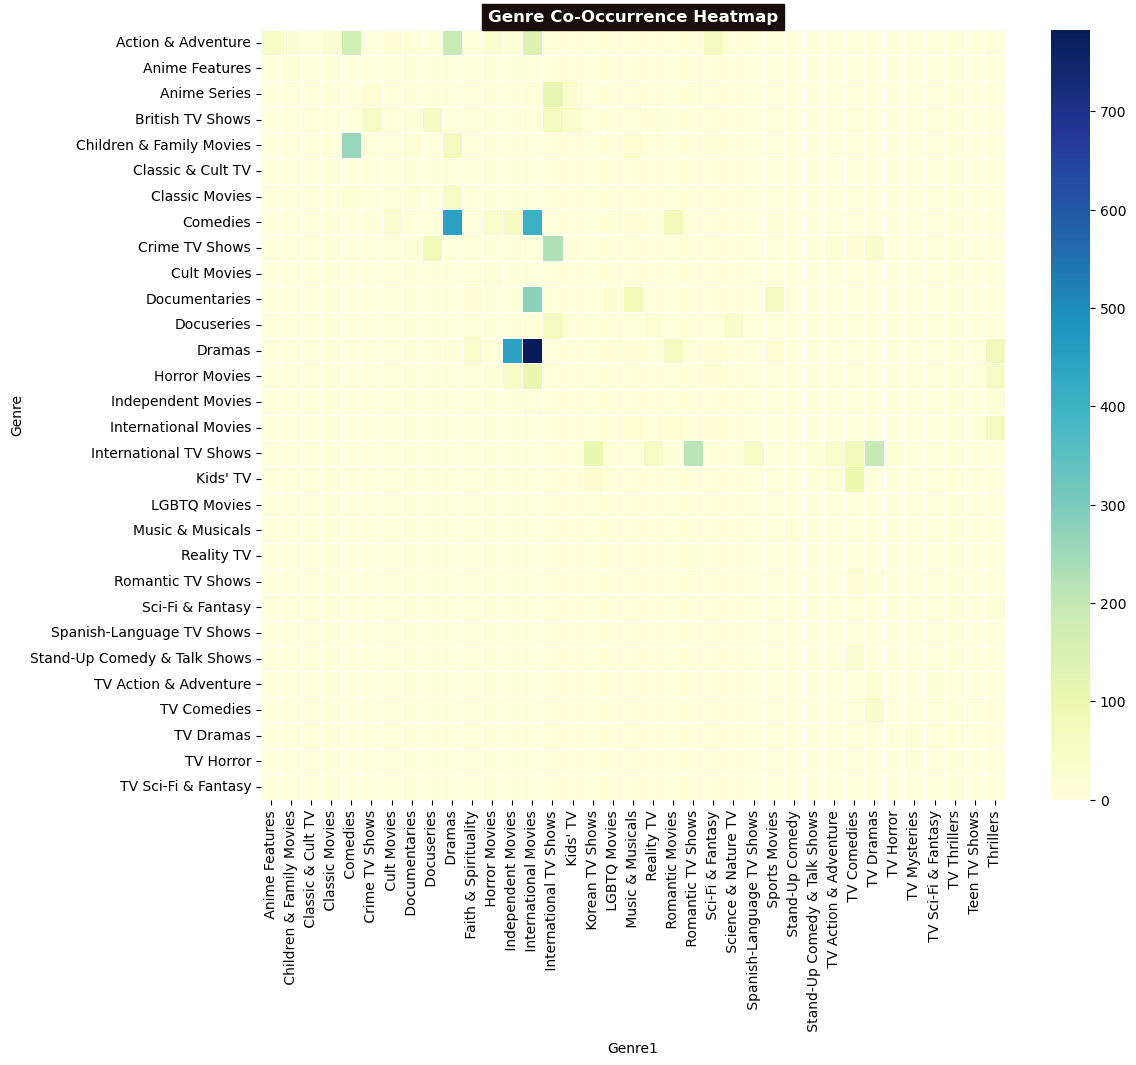

In [67]:

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=False, cmap='YlGnBu', linewidths=.5)
plt.title('Genre Co-Occurrence Heatmap',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Genre1')
plt.ylabel('Genre')
plt.show()

The co-occurrence analysis highlights several genres that commonly appear together, suggesting the presence of hybrid genres. This information can be beneficial for targeted marketing and content creation strategies. like international movies & drama,dramas and independent movies,childer&family with comedy and more like that

# Analyze how the diversity of content, considering genres, countries of origin, and representation, has changed over time.

In [68]:
genre_diversity=netflix.groupby('release_year')['genre'].nunique().rename('Genre_D').reset_index()
country_diversity =netflix.groupby('release_year')['country'].nunique().rename('Country_D').reset_index()

In [69]:
genre_diversity=genre_diversity.sort_values(by='release_year',ascending=False).head(10)

In [70]:
country_diversity=country_diversity.sort_values(by='release_year',ascending=False).head(10)

In [71]:
genre_diversity=genre_diversity.merge(country_diversity,left_on='release_year',right_on='release_year')

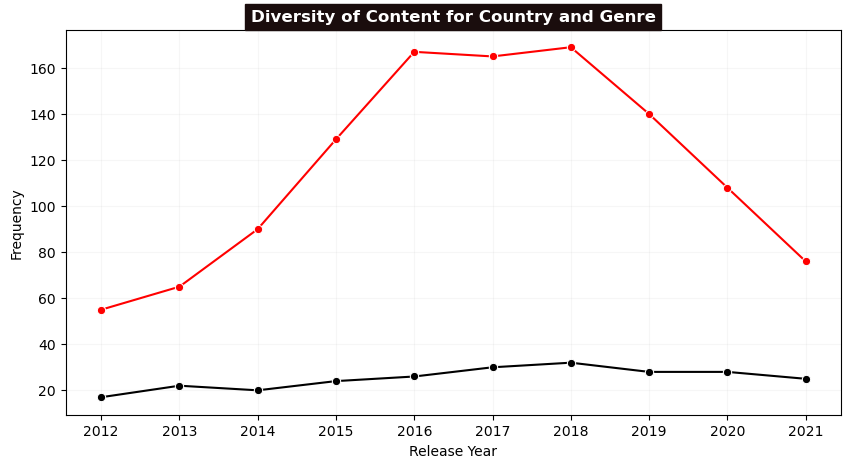

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(x=genre_diversity['release_year'],y=genre_diversity['Country_D'],color='red',marker='o')
sns.lineplot(x=genre_diversity['release_year'],y=genre_diversity['Genre_D'],color='black',marker='o')
plt.xticks(genre_diversity['release_year'])
plt.title('Diversity of Content for Country and Genre',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.ylabel('Frequency')
plt.xlabel('Release Year',color='black')
plt.grid(True,alpha=0.1)
plt.show()

The diversity of content concerning genre and country of origin shows trends of increasing representation over the years. This trend indicates Netflix’s commitment to a broader range of stories and perspectives

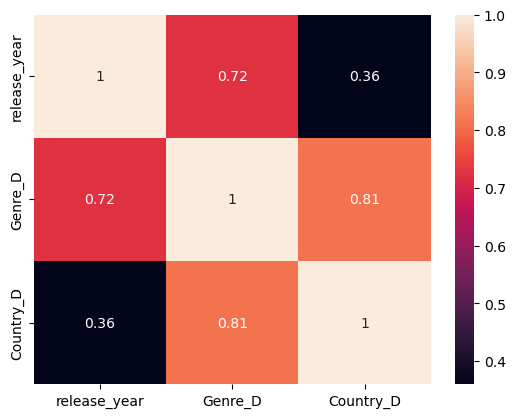

In [73]:
sns.heatmap(genre_diversity.corr(),annot=True)
plt.show()

# Explore whether there is a correlation between the age of content (based on release year) and its current popularity or rating. Does older content remain relevant and well-rated over time?

In [74]:
netflix['content_age']=pd.to_datetime('today').year-netflix['release_year']

In [75]:
correlation_rating=netflix[['content_age', 'Scale_Rating']].corr()

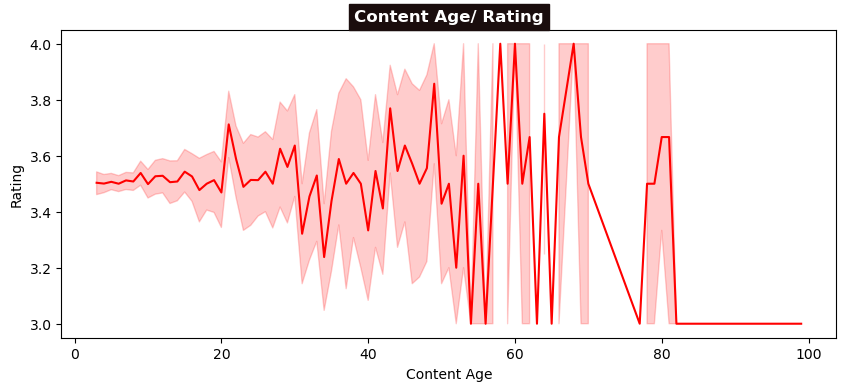

In [76]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=netflix['content_age'], y=netflix['Scale_Rating'], color='red')
plt.title('Content Age/ Rating',color='white',backgroundcolor='#1a0d0d',
          fontweight='bold',fontdict={'size':12,'fontweight': 'bold'})
plt.xlabel('Content Age')
plt.ylabel('Rating')
plt.show()

The analysis of content age versus current popularity demonstrates that older content retains relevance and can still achieve high ratings. This finding suggests that a classic or well-regarded catalog can bolster viewer engagement over time.

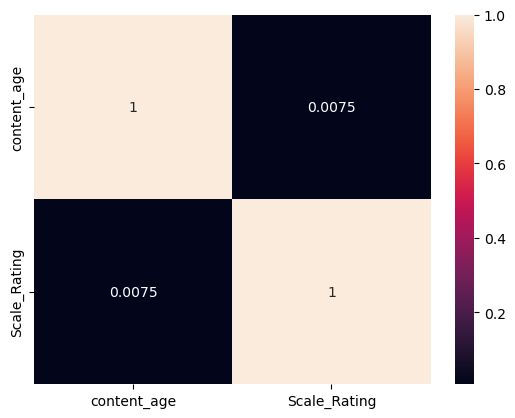

In [77]:
sns.heatmap(correlation_rating,annot=True)
plt.show()